In [31]:
#set up dependencies
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
#import datafile
naloxone = pd.read_csv("original data pulls/overdose_network_data.csv")

In [5]:
#keep only columns we want to look at for now
naloxone_summary = naloxone[["Incident Date", "Incident County Name", "Naloxone Administered",
                            "Survive", "Susp OD Drug Desc"]]
#rename so we have easier handle to work with for syntax
naloxone_summary = naloxone_summary.rename(columns={"Incident Date": "date",
                                                    "Incident County Name": "County",
                                                    "Naloxone Administered": "naloxone",
                                                    "Susp OD Drug Desc": "od_drug_name"})
naloxone_summary.head()

,date,County,naloxone,Survive,od_drug_name
0,1/4/18,Delaware,Y,N,COCAINE/CRACK
1,1/4/18,Delaware,Y,N,COCAINE/CRACK
2,1/4/18,Delaware,Y,N,HEROIN
3,1/4/18,Delaware,Y,N,HEROIN
4,1/26/18,Chester,N,N,HEROIN


In [6]:
#map yes values to 1 and no values to 0
naloxone_summary["naloxone"]= naloxone_summary["naloxone"].map({'N':0, 'Y':1})
naloxone_summary["Survive"]=naloxone_summary["Survive"].map({'N':0, 'Y':1})
naloxone_summary.head()

,date,County,naloxone,Survive,od_drug_name
0,1/4/18,Delaware,1,0.0,COCAINE/CRACK
1,1/4/18,Delaware,1,0.0,COCAINE/CRACK
2,1/4/18,Delaware,1,0.0,HEROIN
3,1/4/18,Delaware,1,0.0,HEROIN
4,1/26/18,Chester,0,0.0,HEROIN


In [7]:
#filter and count # of no naloxone administrations
without = naloxone_summary.loc[naloxone_summary["naloxone"]==0]
without.head()

,date,County,naloxone,Survive,od_drug_name
4,1/26/18,Chester,0,0.0,HEROIN
5,1/24/18,Beaver,0,1.0,HEROIN
6,1/15/18,Bucks,0,1.0,HEROIN
7,1/15/18,Bucks,0,1.0,HEROIN
8,1/1/18,Philadelphia,0,1.0,HEROIN


In [8]:
#find count of non-naloxone od's
withouta = without.groupby("County").naloxone.count()
withouta = pd.DataFrame(withouta)
withouta = withouta.reset_index()
withouta = withouta.rename(columns={"naloxone": "No_Naloxone_Admin"})
withouta

,County,No_Naloxone_Admin
0,Adams,36
1,Allegheny,557
2,Armstrong,27
3,Beaver,57
4,Bedford,13
5,Berks,95
6,Blair,9
7,Bradford,18
8,Bucks,379
9,Butler,28


In [9]:
#find how many survived
survive_without = without.groupby("County").Survive.sum()
survive_without = pd.DataFrame(survive_without)
survive_without = survive_without.reset_index()
survive_without

,County,Survive
0,Adams,22.0
1,Allegheny,362.0
2,Armstrong,6.0
3,Beaver,40.0
4,Bedford,7.0
5,Berks,34.0
6,Blair,5.0
7,Bradford,11.0
8,Bucks,218.0
9,Butler,8.0


In [10]:
#find survival rate
#merge df
survive_no_naloxone = pd.merge(withouta, survive_without, on="County", how="outer")
survive_no_naloxone["rate"]=survive_no_naloxone["Survive"]/survive_no_naloxone["No_Naloxone_Admin"]*100
survive_no_naloxone


,County,No_Naloxone_Admin,Survive,rate
0,Adams,36,22.0,61.111111
1,Allegheny,557,362.0,64.991023
2,Armstrong,27,6.0,22.222222
3,Beaver,57,40.0,70.175439
4,Bedford,13,7.0,53.846154
5,Berks,95,34.0,35.789474
6,Blair,9,5.0,55.555556
7,Bradford,18,11.0,61.111111
8,Bucks,379,218.0,57.519789
9,Butler,28,8.0,28.571429


In [11]:
#do same for those with naloxone administrations
withN = naloxone_summary.loc[naloxone_summary["naloxone"]==1]
withN

,date,County,naloxone,Survive,od_drug_name
0,1/4/18,Delaware,1,0.0,COCAINE/CRACK
1,1/4/18,Delaware,1,0.0,COCAINE/CRACK
2,1/4/18,Delaware,1,0.0,HEROIN
3,1/4/18,Delaware,1,0.0,HEROIN
25,2/13/18,Bradford,1,1.0,HEROIN
29,1/9/18,Lehigh,1,1.0,HEROIN
30,1/18/18,Lehigh,1,0.0,UNKNOWN
31,2/2/18,Lehigh,1,1.0,HEROIN
34,2/10/18,Blair,1,NaN,HEROIN
37,2/21/18,York,1,1.0,HEROIN


In [12]:
#find count of naloxone od's
with_narcan = withN.groupby("County").naloxone.count()
with_narcan = pd.DataFrame(with_narcan)
with_narcan = with_narcan.reset_index()
with_narcan

,County,naloxone
0,Adams,54
1,Allegheny,957
2,Armstrong,32
3,Beaver,69
4,Bedford,17
5,Berks,132
6,Blair,37
7,Bradford,10
8,Bucks,813
9,Butler,56


In [13]:
#find how many survived
survive_with = withN.groupby("County").Survive.sum()
survive_with = pd.DataFrame(survive_with)
survive_with = survive_with.reset_index()
survive_with

,County,Survive
0,Adams,51.0
1,Allegheny,844.0
2,Armstrong,31.0
3,Beaver,61.0
4,Bedford,12.0
5,Berks,118.0
6,Blair,33.0
7,Bradford,9.0
8,Bucks,713.0
9,Butler,46.0


In [14]:
#find survival rate with naloxone
survive_naloxone = pd.merge(with_narcan, survive_with, on="County", how="outer")
survive_naloxone["rate"]=survive_naloxone["Survive"]/survive_naloxone["naloxone"]*100
survive_naloxone

,County,naloxone,Survive,rate
0,Adams,54,51.0,94.444444
1,Allegheny,957,844.0,88.192268
2,Armstrong,32,31.0,96.875000
3,Beaver,69,61.0,88.405797
4,Bedford,17,12.0,70.588235
5,Berks,132,118.0,89.393939
6,Blair,37,33.0,89.189189
7,Bradford,10,9.0,90.000000
8,Bucks,813,713.0,87.699877
9,Butler,56,46.0,82.142857


In [15]:
#run t-test now
population1 = survive_no_naloxone["rate"]
population2 = survive_naloxone["rate"]
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=-9.976963502979716, pvalue=3.5574745556694044e-17)

In [16]:
#we have significance!!!!! Those with naloxone administered are more likely to survive
#now to look at difference in survival with naloxone and opiates vs non-opiates
opiates = pd.read_csv("clean data/naloxone_cleaned.csv")
opiates.head()

,Unnamed: 0,date,County,naloxone,Survive,od_drug_name,year,month,opiate
0,0,1/4/18,Delaware,1,0.0,COCAINE/CRACK,18,1,0
1,1,1/4/18,Delaware,1,0.0,COCAINE/CRACK,18,1,0
2,2,1/4/18,Delaware,1,0.0,HEROIN,18,1,1
3,3,1/4/18,Delaware,1,0.0,HEROIN,18,1,1
4,25,2/13/18,Bradford,1,1.0,HEROIN,18,2,1


In [18]:
#make sure we only have naloxone administrations
yes = opiates["naloxone"].unique()
yes
#now filter by only those who survived
survive_opiates = opiates.loc[opiates["Survive"]==1.0]
survive_opiates.head()

,Unnamed: 0,date,County,naloxone,Survive,od_drug_name,year,month,opiate
4,25,2/13/18,Bradford,1,1.0,HEROIN,18,2,1
5,29,1/9/18,Lehigh,1,1.0,HEROIN,18,1,1
7,31,2/2/18,Lehigh,1,1.0,HEROIN,18,2,1
9,37,2/21/18,York,1,1.0,HEROIN,18,2,1
10,38,2/21/18,York,1,1.0,HEROIN,18,2,1


In [22]:
# number of survivors by county with opiates
surv = survive_opiates.groupby(survive_opiates["County"]).sum()
surv = surv.reset_index()
surv = surv[["County", "opiate"]]
surv

,County,opiate
0,Adams,20
1,Allegheny,446
2,Armstrong,14
3,Beaver,39
4,Bedford,9
5,Berks,58
6,Blair,13
7,Bradford,6
8,Bucks,426
9,Butler,22


In [28]:
#set up df with nonopiate survivors
nonopiates = survive_opiates.loc[opiates["opiate"]==0.0]
nonopiates = nonopiates.groupby(nonopiates["County"]).opiate.count()
nonopiates = pd.DataFrame(nonopiates)
nonopiates = nonopiates.reset_index()
nonopiates = nonopiates.rename(columns={"opiate": "non_opiate"})
nonopiates

,County,non_opiate
0,Adams,15
1,Allegheny,111
2,Armstrong,1
3,Beaver,9
4,Berks,15
5,Blair,10
6,Bucks,48
7,Butler,3
8,Cambria,7
9,Carbon,3


In [29]:
#merge into one dataframe
surv = pd.merge(surv, nonopiates, on="County", how="inner")
surv

,County,opiate,non_opiate
0,Adams,20,15
1,Allegheny,446,111
2,Armstrong,14,1
3,Beaver,39,9
4,Berks,58,15
5,Blair,13,10
6,Bucks,426,48
7,Butler,22,3
8,Cambria,25,7
9,Carbon,42,3


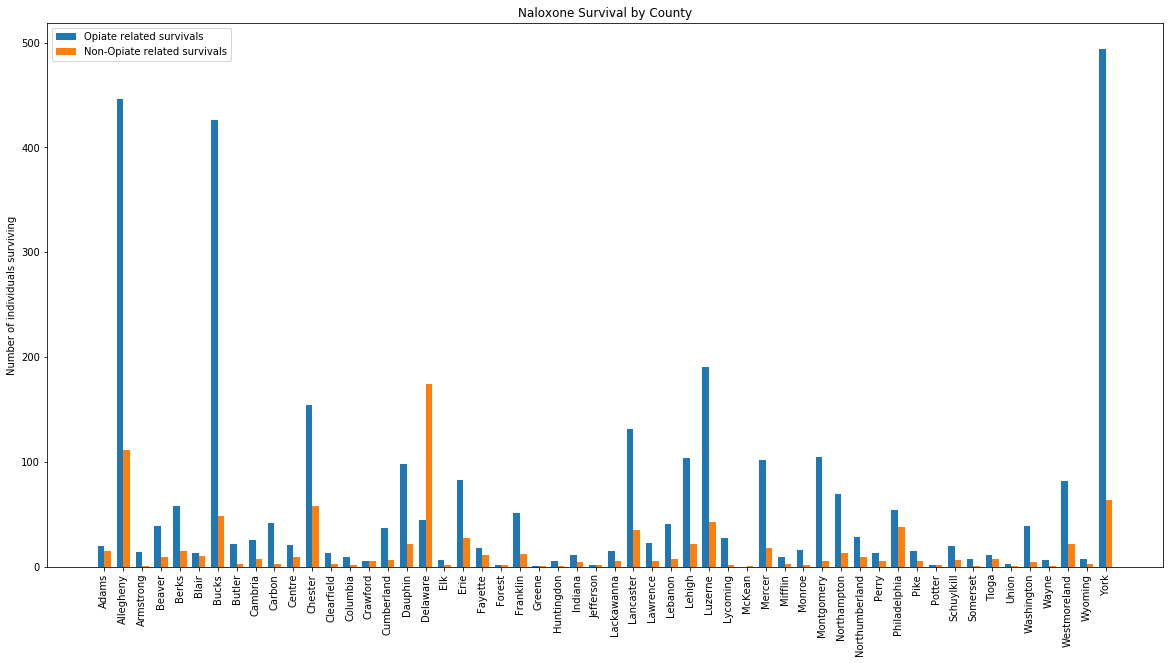

In [33]:
#create bar chart
#create bar chart of naloxone admin and survival per county
ind = np.arange(len(surv["County"]))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (20,10))
rects1 = ax.bar(ind - width/2, surv["opiate"], width, 
                label='Opiate related survivals')
rects2 = ax.bar(ind + width/2, surv["non_opiate"], width, label='Non-Opiate related survivals')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of individuals surviving')
ax.set_title('Naloxone Survival by County')
ax.set_xticks(ind)
ax.set_xticklabels(surv["County"], rotation="vertical")
ax.legend()

plt.savefig("opiate_and_nonopiate_bycounty.png")
plt.show()


In [35]:
#time for hypothesis testing
population1 = surv["opiate"]
population2 = surv["non_opiate"]
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=2.9696238526155994, pvalue=0.004251578345325071)